# Getting started: ML with differential privacy in 30 seconds

We're using the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), so let's load it and perform an 80/20 train/test split.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

Now, let's train a differentially private naive Bayes classifier. Our classifier __runs just like an `sklearn` classifier__, so you can get up and running quickly.

`diffprivlib.models.GaussianNB` can be run __without any parameters__, although this will throw a warning (we need to specify the `bounds` parameter to avoid this). The privacy level is controlled by the parameter `epsilon`, which is passed to the classifier at initialisation (e.g. `models.GaussianNB(epsilon=0.1)`). The default is `epsilon = 1.0`.

In [2]:
import diffprivlib.models as dp

clf = dp.GaussianNB()
clf.fit(X_train, y_train)

/usr/lib/python3.6/site-packages/diffprivlib/models/naive_bayes.py:75: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  "privacy leakage, specify bounds for each dimension.", PrivacyLeakWarning)


GaussianNB(bounds=[(4.4, 7.9), (2.0, 4.2), (1.0, 6.6), (0.1, 2.5)], epsilon=1,
           priors=None, var_smoothing=1e-09)

We can now classify unseen examples, knowing that the trained model is differentially private and preserves the privacy of the 'individuals' in the training set (flowers are entitled to their privacy too!).

In [3]:
clf.predict(X_test)

array([1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 1])

Every time the model is trained with `.fit()`, a different model is produced due to the randomness of differential privacy. The accuracy will therefore change, even if it's re-trained with the same training data. Try it for yourself to find out!

In [4]:
(clf.predict(X_test) == y_test).sum() / y_test.shape[0]

0.9333333333333333

We can easily evaluate the accuracy of the model for various `epsilon` values and plot it with `matplotlib`.

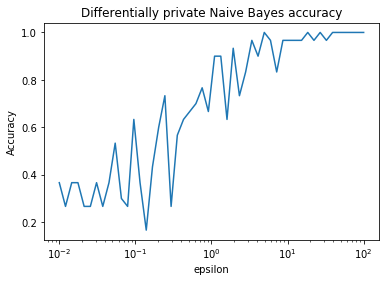

In [5]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = [(4.3, 7.9), (2.0, 4.4), (1.1, 6.9), (0.1, 2.5)]
accuracy = list()

for epsilon in epsilons:
    clf = dp.GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append((clf.predict(X_test) == y_test).sum() / y_test.shape[0])

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

Congratulations, you've completed your first differentially private machine learning task with the Differential Privacy Library!  Check out more examples in the [notebooks](./) directory, or [dive straight in](../diffprivlib/).